### VLM test: omitting title, rendering LaTeX, truncating $2 \leq \ell \leq 2500$ to $2 \leq \ell \leq 100$

In [ ]:
import cmbagent

result = cmbagent.one_shot(
    task= r"""
Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class

# Get all C_l output

# Plotting
""",    
    agent="engineer",
    evaluate_plots=True,
    max_n_plot_evals=2
)


Use the CLASS cosmology code (via classy) to compute the CMB TT power spectrum for Planck 2018 LCDM parameters. 

Plot the lensed TT spectrum for 2 <= l <= 2500.

Here's a general outline to follow:

# Imports

# Create instance of the class "Class"

# Pass LambdaCDM input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class

# Get all C_l output

# Plotting


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 engineer 0.01112           1938                906          2844
**Code Explanation:**

This code uses the CLASS cosmology code (via the `classy` Python interface) to compute the lensed CMB TT power spectrum for Planck 2018 LCDM parameters. It sets up

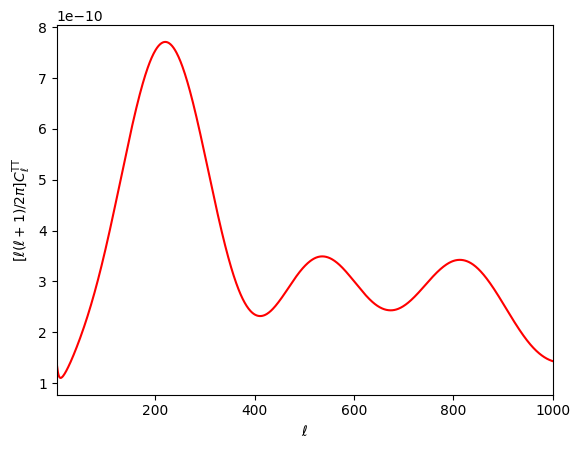

In [2]:
# https://github.com/lesgourg/class_public/blob/master/notebooks/warmup.ipynb

from classy import Class
import matplotlib.pyplot as plt
from math import pi

# Create instance of the class "Class"
LambdaCDM = Class()

# Pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})

# Run class
LambdaCDM.compute()

# get all C_l output
cls = LambdaCDM.lensed_cl(1000)
ll = cls['ell'][2:]
clTT = cls['tt'][2:]

plt.xscale('linear')
plt.yscale('linear')
plt.xlim(2,1000)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'r-')
plt.show()